## 합성곱 신경망의 시각화

### 가중치 시각화

In [2]:
# 커널이 이미지의 특별한 패턴을 확인하고 가중치가 높은 곳은 밝게 나올거임
# 그러면 가중치를 눈으로 확인해보자
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_7, built=True>]

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape)
# 지난시간에 만든 3, 3 은 커널의 크기
# 총 32개의 필터(뉴런)을 만든거임
# 절편 또한 32개

(3, 3, 1, 32)


(array([ 2.,  0.,  3.,  1.,  4., 23., 56., 76., 94., 29.]),
 array([-1.16406345, -1.0113039 , -0.85854435, -0.70578474, -0.55302519,
        -0.40026563, -0.24750607, -0.09474651,  0.05801306,  0.21077262,
         0.36353219]),
 <BarContainer object of 10 artists>)

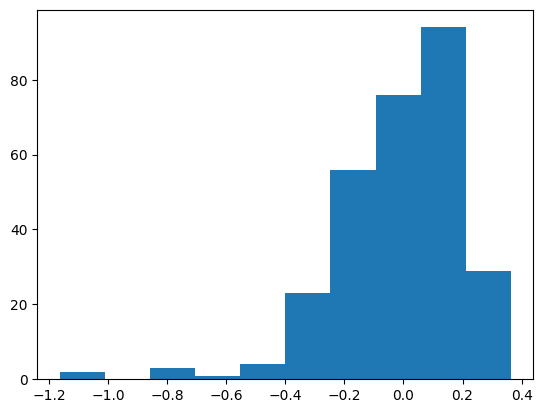

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv.weights[0].numpy().reshape(-1, 1))
# conv 는 3 * 3* 1 * 32 인 4차원 데이터
# reshape은 재정렬임. -1은 안에 몇개가 들어와도 상관없다는 뜻. 1은 뒤에 1차원으로 표시한다는것
# 즉, 3*3*1*32 인 가중치를 1차원으로 만든거임
# 이미지 픽셀을 한줄로 만든거임

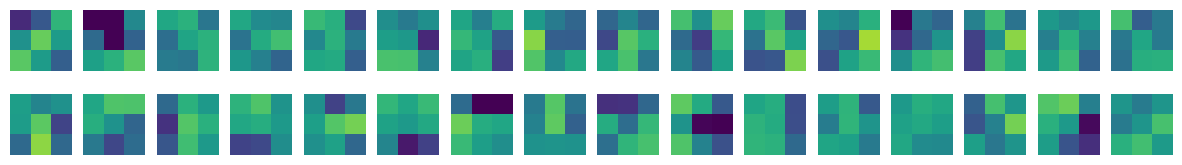

In [9]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
conv_weights = conv.weights[0].numpy()
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5, )
        axs[i, j].axis('off')

# 검정 부분은 가중치가 낮은걸 나타냄
# 아래의 패턴을 찾아내어 비교

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

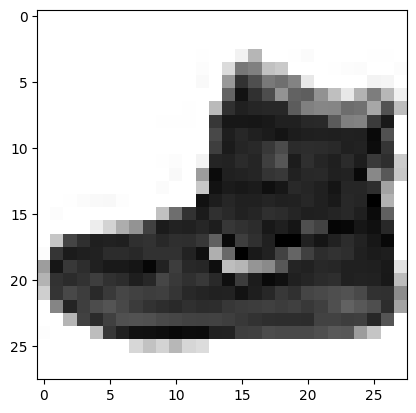

In [12]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [13]:
# 슬라이싱한 이유는 차원을 유지하기 위해
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

In [17]:
conv_acit = keras.Model(model.layers[0].input, model.layers[0].output)

In [18]:
# 위에있는 input은 신발데이터 사진 한장
# 신발데이터를 conv_acti에 할당할거임
# 신발 넣을테니 학습한 가중치 확인해봐 라는 뜻
# 위에 초록색으로 나타난 32개의 필터를 신발에 적용해보는 거임
feature_maps = conv_acit.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


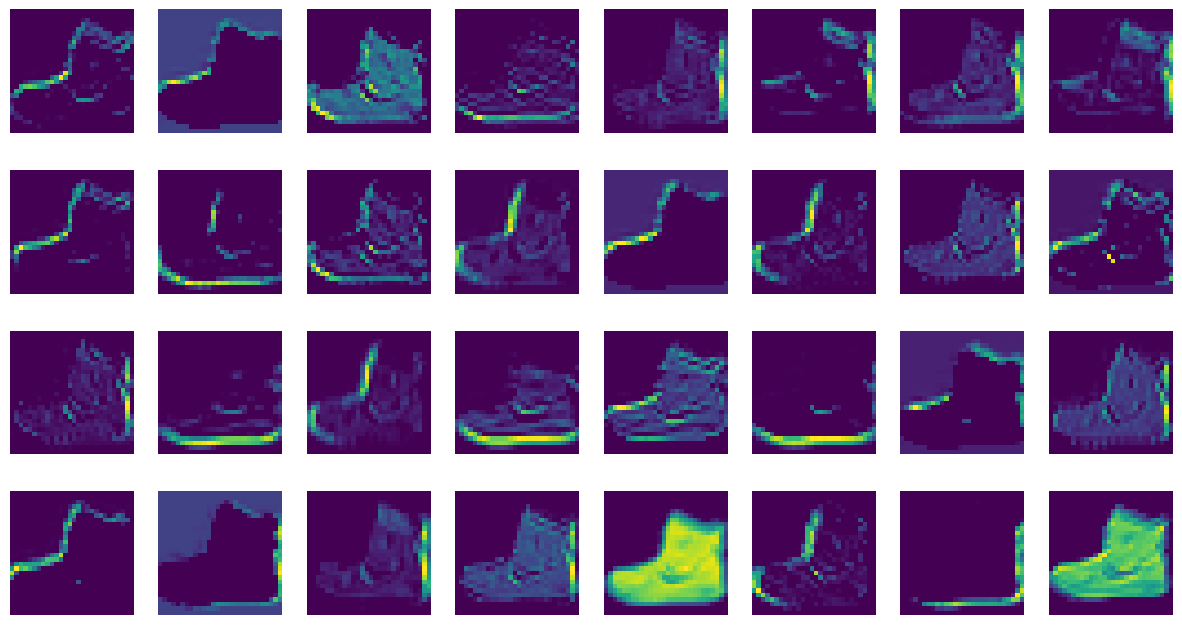

In [22]:
# 신발데이터에 특성맵 필터로 확인하는 거임
# 필터링을 통해 특징을 확인한다.
# 특징들을 모아서 다시 분류
# 특성들을 확인해 보면 초록부분으로 확인됨
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()